In [4]:
pwd

'C:\\Users\\Amir\\Desktop\\mygit'

In [13]:
from __future__ import print_function

# This jupyter notebook command inserts matplotlib graphics in 
# to the workbook
%matplotlib inline

# Modify these to point to your own files
WRF_DIRECTORY = "./wrf_python_tutorial/wrf_tutorial_data/" 
WRF_FILES = ["wrfout_d01_2005-08-28_00_00_00",
             "wrfout_d01_2005-08-28_12_00_00",
             "wrfout_d01_2005-08-29_00_00_00"]


# Do not modify the code below this line
#------------------------------------------------------
# Turn off annoying warnings
import warnings
warnings.filterwarnings('ignore')

# Make sure the environment is good
import numpy as np
import cartopy
from cartopy import crs
from cartopy.feature import NaturalEarthFeature
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import os

from wrf import (getvar, interplevel, vertcross, 
                 CoordPair, ALL_TIMES, to_np,
                 get_cartopy, latlon_coords,
                 cartopy_xlim, cartopy_ylim)

_WRF_FILES = [os.path.abspath(os.path.expanduser(
    os.path.join(WRF_DIRECTORY, f))) for f in WRF_FILES]

# Check that the WRF files exist
for f in _WRF_FILES:
    if not os.path.exists(f):
        raise ValueError("{} does not exist. "
            "Check for typos or incorrect directory.")

# Create functions so that the WRF files only need
# to be specified using the WRF_FILES global above
def single_wrf_file(i=0):
    global _WRF_FILES
    return _WRF_FILES[i]

def multiple_wrf_files():
    global _WRF_FILES
    return _WRF_FILES

print("All tests passed!")


All tests passed!


In [14]:
file_path = single_wrf_file()

In [15]:
file_path

'C:\\Users\\Amir\\Desktop\\mygit\\wrf_python_tutorial\\wrf_tutorial_data\\wrfout_d01_2005-08-28_00_00_00'

In [16]:
wrfin = Dataset(file_path)

In [18]:
# wrfin

In [20]:
var = wrfin.variables['V']

In [21]:
var

<class 'netCDF4._netCDF4.Variable'>
float32 V(Time, bottom_top, south_north_stag, west_east)
    FieldType: 104
    MemoryOrder: XYZ
    description: y-wind component
    units: m s-1
    stagger: Y
    coordinates: XLONG_V XLAT_V XTIME
unlimited dimensions: Time
current shape = (4, 29, 74, 90)
filling on, default _FillValue of 9.969209968386869e+36 used

In [23]:
coords = var.coordinates

In [24]:
coords

'XLONG_V XLAT_V XTIME'

In [25]:
var_all_dat = var[:]

In [26]:
type(var_all_dat)

numpy.ma.core.MaskedArray

In [27]:
t0_data = var[:2]

In [29]:
# t0_data

In [30]:
ds = xr.open_dataset(file_path, decode_times=False)

new_file = 'single_wrf_subset.nc'

toinclude = ['HGT', 'QVAPOR', 'QRAIN', 'QCLOUD', 'P', 'PB', 'PHB', 'PH', 'T', 'U', 'V']

ds[toinclude].to_netcdf(new_file)


In [34]:
hgt = getvar(wrfin, 'z',  timeidx=0)

In [35]:
print(hgt.shape)

(29, 73, 90)


In [36]:
print(hgt)

<xarray.DataArray 'height' (bottom_top: 29, south_north: 73, west_east: 90)>
array([[[  945.71625 ,   851.59564 ,  1112.1707  , ...,    30.325289,
            30.318182,    30.28183 ],
        [ 1545.8838  ,  1482.51    ,  1743.5214  , ...,    30.357103,
            30.33118 ,    30.289024],
        [ 2015.4645  ,  2132.7654  ,  2336.6702  , ...,    45.30595 ,
            54.560974,    52.540306],
        ...,
        [  931.7109  ,   906.58606 ,   850.66223 , ...,    47.566196,
            42.868397,    39.25265 ],
        [  912.6646  ,   871.99146 ,   829.11066 , ...,    50.54069 ,
            44.59204 ,    40.01426 ],
        [  933.89813 ,   891.87317 ,   845.05554 , ...,    56.942154,
            45.73114 ,    40.755768]],

       [[ 1019.3371  ,   924.95416 ,  1184.8784  , ...,   104.14779 ,
           104.084015,   104.00254 ],
        [ 1617.7285  ,  1554.756   ,  1814.6649  , ...,   104.2065  ,
           104.1027  ,   104.08364 ],
        [ 2085.935   ,  2202.975   ,  2406.2

In [44]:
slp = getvar(wrfin, 'slp', units='mmhg')

In [38]:
temp = getvar(wrfin, 'temp', units='degF')

In [40]:
type(slp)

xarray.core.dataarray.DataArray

In [45]:
print(slp)

<xarray.DataArray 'slp' (south_north: 73, west_east: 90)>
array([[756.1134 , 756.4874 , 757.55414, ..., 756.7633 , 756.83887,
        756.92206],
       [757.4438 , 757.6284 , 758.1839 , ..., 756.9201 , 757.09595,
        757.5991 ],
       [758.3909 , 758.69214, 759.04535, ..., 757.3468 , 758.11475,
        757.9879 ],
       ...,
       [758.63873, 758.7369 , 758.7503 , ..., 760.1761 , 760.20795,
        760.25354],
       [758.45856, 758.53644, 758.6092 , ..., 760.27057, 760.2961 ,
        760.33746],
       [758.35815, 758.43677, 758.51   , ..., 760.3648 , 760.3757 ,
        760.41595]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.0 -100.7 ... -77.26 -76.99
    XLAT     (south_north, west_east) float32 19.11 19.11 19.11 ... 36.22 36.22
    XTIME    float32 0.0
    Time     datetime64[ns] 2005-08-28
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    description:  sea level pressure
    

In [47]:
file_paths = multiple_wrf_files()

In [48]:
file_paths

['C:\\Users\\Amir\\Desktop\\mygit\\wrf_python_tutorial\\wrf_tutorial_data\\wrfout_d01_2005-08-28_00_00_00',
 'C:\\Users\\Amir\\Desktop\\mygit\\wrf_python_tutorial\\wrf_tutorial_data\\wrfout_d01_2005-08-28_12_00_00',
 'C:\\Users\\Amir\\Desktop\\mygit\\wrf_python_tutorial\\wrf_tutorial_data\\wrfout_d01_2005-08-29_00_00_00']

In [49]:
wrf_files = [Dataset(f) for f in file_paths]

In [52]:
slp = getvar(wrf_files, 'slp', timeidx=8, units='mb')

In [54]:
print(slp)

<xarray.DataArray 'slp' (south_north: 73, west_east: 90)>
array([[1005.59766, 1006.5532 , 1008.0106 , ..., 1008.6874 , 1008.7415 ,
        1008.8016 ],
       [1006.8632 , 1007.72314, 1008.94745, ..., 1008.85175, 1008.946  ,
        1009.7403 ],
       [1007.9812 , 1009.3069 , 1010.06055, ..., 1008.9118 , 1009.16486,
        1010.12506],
       ...,
       [1008.617  , 1009.7796 , 1010.15106, ..., 1011.46246, 1011.4978 ,
        1011.45306],
       [1008.7501 , 1009.4004 , 1009.9343 , ..., 1011.53546, 1011.5264 ,
        1011.50323],
       [1009.1396 , 1009.1863 , 1009.39514, ..., 1011.60065, 1011.5598 ,
        1011.5563 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.0 -100.7 ... -77.26 -76.99
    XLAT     (south_north, west_east) float32 19.11 19.11 19.11 ... 36.22 36.22
    XTIME    float32 1.44e+03
    Time     datetime64[ns] 2005-08-29
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY


In [55]:
slp = getvar(wrf_files, 'slp', timeidx=ALL_TIMES, method='cat')
print(slp)

<xarray.DataArray 'slp' (Time: 9, south_north: 73, west_east: 90)>
array([[[1008.0681 , 1008.5668 , 1009.98895, ..., 1008.9346 ,
         1009.03534, 1009.14624],
        [1009.84186, 1010.088  , 1010.82855, ..., 1009.1437 ,
         1009.37805, 1010.04895],
        [1011.1046 , 1011.50616, 1011.97705, ..., 1009.7125 ,
         1010.7363 , 1010.56726],
        ...,
        [1011.43494, 1011.5658 , 1011.5837 , ..., 1013.4846 ,
         1013.5271 , 1013.5879 ],
        [1011.1947 , 1011.2986 , 1011.39557, ..., 1013.6106 ,
         1013.64453, 1013.69977],
        [1011.06085, 1011.1657 , 1011.2633 , ..., 1013.7362 ,
         1013.7507 , 1013.8044 ]],

       [[1009.04877, 1009.9049 , 1011.2189 , ..., 1009.2124 ,
         1009.2859 , 1009.3749 ],
        [1010.57367, 1011.02136, 1012.0837 , ..., 1009.4918 ,
         1009.5938 , 1010.2147 ],
        [1011.70764, 1012.7197 , 1013.5105 , ..., 1009.67847,
         1009.7583 , 1010.7029 ],
...
        [1010.0159 , 1010.5553 , 1010.7108 , ..., 

In [56]:
pres = getvar(wrfin, 'pressure', timeidx=0)
ht = getvar(wrfin, 'z', timeidx=0, units='m')


In [58]:
ht_500 = interplevel(ht, pres, 500.0)

In [59]:
print(ht_500)

<xarray.DataArray 'height_interp' (south_north: 73, west_east: 90)>
array([[5910.48  , 5921.3975, 5924.3096, ..., 5894.322 , 5892.936 ,
        5891.851 ],
       [5891.451 , 5901.656 , 5906.4966, ..., 5896.076 , 5895.119 ,
        5894.6274],
       [5897.6562, 5900.0874, 5898.296 , ..., 5897.6147, 5896.4673,
        5895.9224],
       ...,
       [5901.6494, 5900.2744, 5899.1177, ..., 5886.303 , 5886.465 ,
        5886.476 ],
       [5901.703 , 5900.695 , 5899.57  , ..., 5885.7812, 5885.9136,
        5885.898 ],
       [5901.4346, 5900.5493, 5899.527 , ..., 5884.939 , 5884.971 ,
        5884.863 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -101.0 -100.7 ... -77.26 -76.99
    XLAT     (south_north, west_east) float32 19.11 19.11 19.11 ... 36.22 36.22
    XTIME    float32 0.0
    Time     datetime64[ns] 2005-08-28
    level    float64 500.0
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          m
 

In [60]:
# Use single file path (wrfin) for this example

# Use the wrfin XLAT and XLONG variables to create coordinates
lat_coords = wrfin.variables['XLAT']
lon_coords = wrfin.variables['XLONG']

# Numpy is used to identify the start and stop lat/lon coordinate pairs
coord_start = (np.amin(lat_coords), np.amin(lon_coords))
coord_end = (np.amax(lat_coords), np.amax(lon_coords))

start_point = CoordPair(lat=coord_start[0],lon=coord_start[1]) # Why is the coordinate selected this way?
end_point = CoordPair(lat=coord_end[0],lon=coord_end[1])

# Let's get wind speed ('wspd_wdir') in kts at time index 0
wspd_wdir = getvar(wrfin, 'wspd_wdir', timeidx=0, units='kts')

# Get the height levels ('z') at the correct time idx
ht = getvar(wrfin, 'z', timeidx=0)

# Compute the wind speed cross section
wspd_cross = vertcross(wspd_wdir, ht, wrfin=wrfin, start_point=start_point, end_point=end_point)

print(wspd_cross)

<xarray.DataArray 'wspd_wdir_cross' (wspd_wdir: 2, vertical: 100,
                                     cross_line_idx: 115)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,   6.6589932,
           7.310721 ,   8.34278  ],
        [        nan,         nan,         nan, ...,   9.173474 ,
          10.298722 ,  11.673863 ],
        ...,
        [ 30.791243 ,  30.527824 ,  30.21583  , ...,   9.146236 ,
           9.104509 ,   9.075556 ],
        [ 32.16003  ,  31.79801  ,  31.464676 , ...,   9.643409 ,
           9.628514 ,   9.63235  ],
        [        nan,  33.068195 ,  32.713524 , ...,  10.140581 ,
          10.152519 ,  10.189144 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ..., 106.12919  ,
         112.115265 , 116.86441  ],
        [        nan,         nan,         n

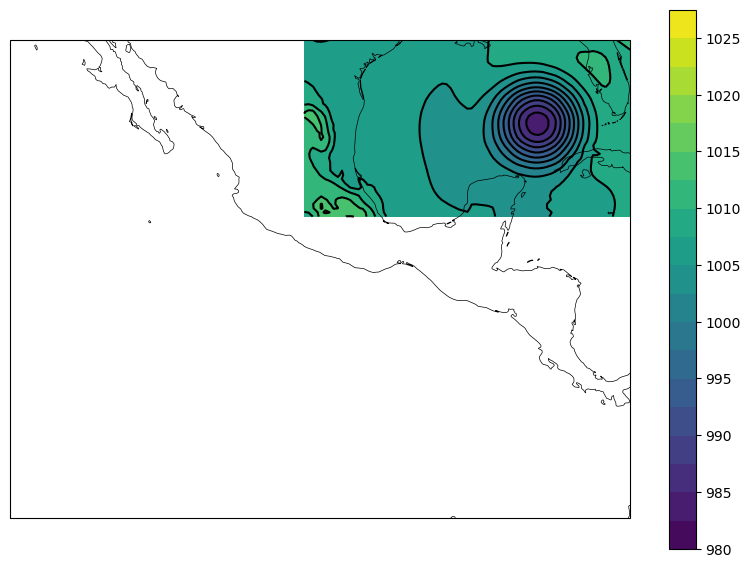

In [77]:
slp = getvar(wrfin, 'slp', timeidx=0)
cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=cart_proj) 
ax.coastlines(linewidth=0.5)

lvl = np.arange(980, 1030, 2.5)


# Add contour lines
plt.contour(lons,
            lats,
            slp, 
            levels=lvl,
            colors='k',
            transform=crs.PlateCarree())

# Add filled contour lines
plt.contourf(lons,
             lats,
             slp,
             levels=lvl,
             transform=crs.PlateCarree(),
             cmap='viridis')

plt.colorbar(ax=ax, shrink=0.7)

ax.set_extent([-120, -80, 0, 28])

plt.show()

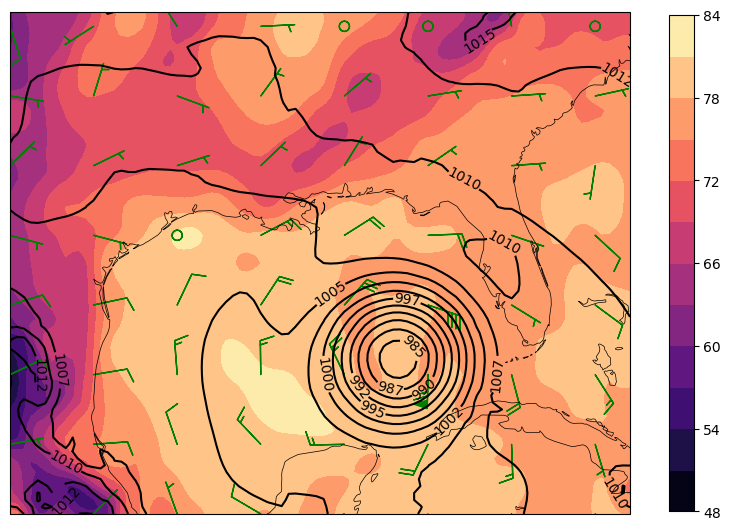

In [94]:
slp = getvar(wrfin, "slp", timeidx=0)
td2 = getvar(wrfin, "td2", timeidx=0, units="degF")

u_sfc = getvar(wrfin, "ua", timeidx=0, units="kts")[0,:] # subset data to match size of td2 and slp, use units "kts"
v_sfc = getvar(wrfin, "va", timeidx=0, units="kts")[0,:]


cart_proj = get_cartopy(slp)
lats, lons = latlon_coords(slp)

fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection=cart_proj)
ax.coastlines(linewidth=0.5)


slp_levels = np.arange(980, 1030, 2.5)
td2_levels = np.arange(48, 85, 3)

slp_contours = plt.contour(lons,
                           lats,
                           slp,
                           levels=slp_levels,
                           colors='k',
                           transform=crs.PlateCarree())

plt.contourf(lons,
             lats,
             td2,
             levels=td2_levels,
             transform=crs.PlateCarree(),
             cmap='magma')
thin = [int(x/7.) for x in lons.shape]
plt.barbs(to_np(lons[::thin[0], ::thin[1]]), 
          to_np(lats[::thin[0], ::thin[1]]),
          to_np(u_sfc[::thin[0], ::thin[1]]),
          to_np(v_sfc[::thin[0], ::thin[1]]),
          transform=crs.PlateCarree(),
          color = 'green')


plt.clabel(slp_contours, fmt="%i")

# Add a color bar
plt.colorbar(ax=ax, shrink=.86, extendrect=True)

plt.show()


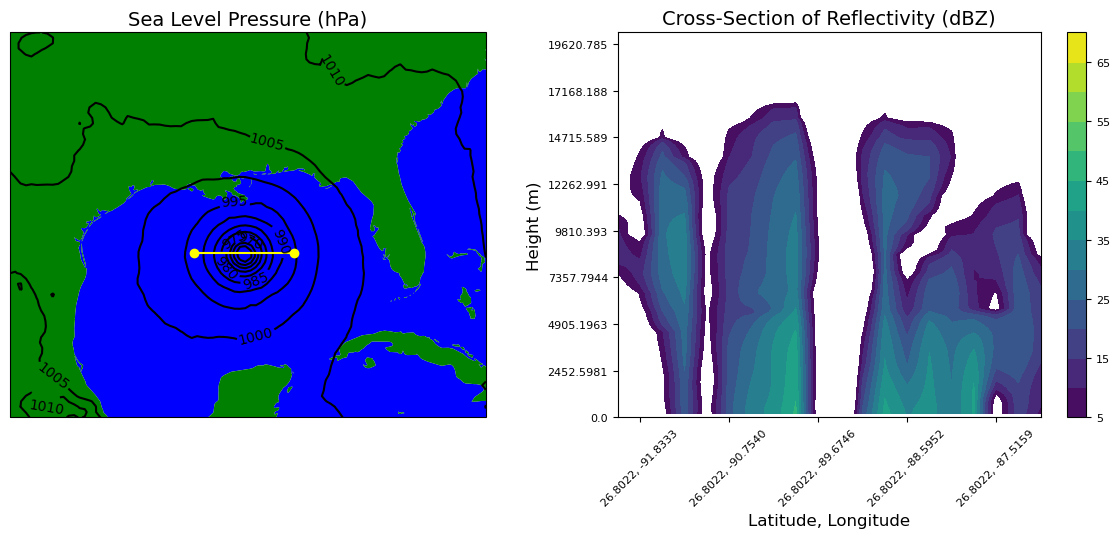

In [95]:
# Define a cross section with latitude and longitude coordinates
cross_start = CoordPair(lat=26.75, lon=-91.7)
cross_end = CoordPair(lat=26.75, lon=-86.7)

# Use multi-file wrfin 'wrf_files' for this example
# Get WRF variables "slp", "height", and "dbz"
slp = getvar(wrf_files, "slp", timeidx=-1) # -1 is last element in the sequence
ht = getvar(wrf_files, "z", timeidx=-1)
dbz = getvar(wrf_files, "dbz", timeidx=-1)
z = 10**(dbz/10.) # Use linear z for interpolation

# Compute the vertical cross-section interpolation. Include the lat/lon
# points along the cross-section in the metadata by setting latlon to True.
z_cross = vertcross(z,
                    ht,
                    wrfin=wrf_files,
                    start_point=cross_start,
                    end_point=cross_end,
                    latlon=True,
                    meta=True)

# Convert back to dBz after interpolation
dbz_cross = 10.0 * np.log10(z_cross)

# Get the lat/lon points
lats, lons = latlon_coords(slp)

# Get the cartopy projection object
cart_proj = get_cartopy(slp)

# Create a figure that will have 2 subplots (1 row, 2 columns)
# Signature: Figure.add_subplot(nrows, ncols, index, **kwargs)
fig = plt.figure(figsize=(15,5))
ax_slp = fig.add_subplot(1, 2, 1, projection=cart_proj)
ax_dbz = fig.add_subplot(1, 2, 2)

# Create states, land, and ocean features using Cartopy 
# states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
#                                       name='admin_1_states_provinces_shp')
land = NaturalEarthFeature(category='physical', name='land', scale='50m',
                                    facecolor='green')
ocean = NaturalEarthFeature(category='physical', name='ocean', scale='50m',
                                     facecolor='blue')

# state =

# Make the pressure contours
slp_levels = np.arange(950, 1030, 5)
slp_contours = ax_slp.contour(lons,
                              lats,
                              slp,
                              levels=slp_levels,
                              colors="black",
                              zorder=3,
                              transform=crs.PlateCarree())

# Add contour labels for pressure
ax_slp.clabel(slp_contours, fmt="%i")

# Draw the cross section line
ax_slp.plot([cross_start.lon, cross_end.lon], # Why can we call cross_start this way?
            [cross_start.lat, cross_end.lat],
            color="yellow", 
            marker="o",  
            zorder=3,
            transform=crs.PlateCarree())

# Draw the oceans, land, and states
ax_slp.add_feature(ocean)
ax_slp.add_feature(land)
# ax_slp.add_feature(states, linewidth=.5, edgecolor="black")

# Make the contour plot for dbz
dbz_levels = np.arange(5.,75.,5.)
dbz_contours = ax_dbz.contourf(dbz_cross,
                               levels=dbz_levels,
                               cmap='viridis')

cb_dbz = fig.colorbar(dbz_contours, ax=ax_dbz)
cb_dbz.ax.tick_params(labelsize=8)

# Set the x-ticks to use latitude and longitude labels
coord_pairs = to_np(dbz_cross.coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = [pair.latlon_str() for pair in to_np(coord_pairs)]
thin = [int(x/5.) for x in x_ticks.shape] # Only keeping ~5 horizontal ticks
ax_dbz.set_xticks(x_ticks[1::thin[0]])
ax_dbz.set_xticklabels(x_labels[::thin[0]], rotation=45, fontsize=8)

# Set the y-ticks to be height
vert_vals = to_np(dbz_cross.coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
thin = [int(x/8.) for x in v_ticks.shape] # Only keeping ~8 vertical ticks
ax_dbz.set_yticks(v_ticks[::thin[0]])
ax_dbz.set_yticklabels(vert_vals[::thin[0]], fontsize=8)

# Set the x-axis and  y-axis labels
ax_dbz.set_xlabel("Latitude, Longitude", fontsize=12)
ax_dbz.set_ylabel("Height (m)", fontsize=12)

# Add a title
ax_slp.set_title("Sea Level Pressure (hPa)", {"fontsize" : 14})
ax_dbz.set_title("Cross-Section of Reflectivity (dBZ)", {"fontsize" : 14})

plt.show()

In [89]:
thin = [int(x/7.) for x in lons.shape]

In [90]:
thin

[10, 12]

In [82]:
lons.shape

(73, 90)

In [67]:
# cart_proj